<a href="https://colab.research.google.com/github/ghizlane89/0__GenIA/blob/Bootcamp/W4_D5_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from google.colab import drive

#print("\n🔄 Montage de Google Drive...")
drive.mount('/content/drive')

# Étape 1 : Importer les fichiers
df_pokemon = pd.read_csv('/content/drive/My Drive/Datasets/pokemon.csv')
df_combats = pd.read_csv('/content/drive/My Drive/Datasets/combats.csv')

df = pd.merge(
    df_combats [['First_pokemon', 'Second_pokemon', 'Winner']],
    df_pokemon [['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary']],
    left_on='Winner',
    right_on='#',
    how='left'
)

print(df.head().T)

print(df.shape)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                      0          1         2          3        4
First_pokemon       266        702       191        237      151
Second_pokemon      298        701       668        683      231
Winner              298        701       668        683      151
#                   298        701       668        683      151
Name            Nuzleaf  Terrakion  Beheeyem  Druddigon  Omastar
Type 1            Grass       Rock   Psychic     Dragon     Rock
Type 2             Dark   Fighting       NaN        NaN    Water
HP                   70         91        75         77       70
Attack               70        129        75        120       60
Defense              40         90        75         90      125
Sp. Atk              60         72       125         60      115
Sp. Def              40         90        95         90       70
Speed                60   

In [5]:
# Fusionner les datasets
import pandas as pd

merged_df = df_combats.merge(df_pokemon, how='left', left_on='First_pokemon', right_on='#')
merged_df = merged_df.rename(columns=lambda x: f'First_{x}' if x in df_pokemon.columns and x != '#' else x)


merged_df = merged_df.merge(df_pokemon, how='left', left_on='Second_pokemon', right_on='#')
merged_df = merged_df.rename(columns=lambda x: f'Second_{x}' if x in df_pokemon.columns and x != '#' else x)

print(merged_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   First_pokemon      50000 non-null  int64 
 1   Second_pokemon     50000 non-null  int64 
 2   Winner             50000 non-null  int64 
 3   #_x                50000 non-null  int64 
 4   First_Name         49944 non-null  object
 5   First_Type 1       50000 non-null  object
 6   First_Type 2       25969 non-null  object
 7   First_HP           50000 non-null  int64 
 8   First_Attack       50000 non-null  int64 
 9   First_Defense      50000 non-null  int64 
 10  First_Sp. Atk      50000 non-null  int64 
 11  First_Sp. Def      50000 non-null  int64 
 12  First_Speed        50000 non-null  int64 
 13  First_Generation   50000 non-null  int64 
 14  First_Legendary    50000 non-null  bool  
 15  #_y                50000 non-null  int64 
 16  Second_Name        49948 non-null  objec

In [6]:


# Remplacer les noms manquants pour le Pokémon #62 par "Primeape"
merged_df.loc[merged_df['#_x'] == 62, 'First_Name'] = merged_df.loc[merged_df['#_x'] == 62, 'First_Name'].fillna('Primeape')
merged_df.loc[merged_df['#_y'] == 62, 'Second_Name'] = merged_df.loc[merged_df['#_y'] == 62, 'Second_Name'].fillna('Primeape')

# Remplacer les valeurs manquantes dans les colonnes Type 2 par "None"
merged_df['First_Type 2'] = merged_df['First_Type 2'].fillna('None')
merged_df['Second_Type 2'] = merged_df['Second_Type 2'].fillna('None')

# Vérification rapide
print(merged_df[['First_Name', 'Second_Name']].isnull().sum())
print(merged_df[['First_Type 2', 'Second_Type 2']].isnull().sum())

First_Name     56
Second_Name    52
dtype: int64
First_Type 2     0
Second_Type 2    0
dtype: int64


In [8]:
# Étape 1 : Calculer le nombre total de combats pour chaque Pokémon (qu'il soit en premier ou en second)
total_battles = pd.concat([
    merged_df['First_pokemon'],
    merged_df['Second_pokemon']
]).value_counts().rename('Total_Battles')

# Étape 2 : Déterminer le nombre total de victoires pour chaque Pokémon
total_wins = merged_df['Winner'].value_counts().rename('Wins')

# Étape 3 : Fusionner les deux séries en un seul tableau de statistiques
win_stats = pd.concat([total_battles, total_wins], axis=1).fillna(0)

# Étape 4 : Calculer le pourcentage de victoires pour chaque Pokémon
win_stats['Win_Percentage'] = (win_stats['Wins'] / win_stats['Total_Battles']) * 100

# Étape 5 : Arrondir les résultats pour une meilleure lisibilité
win_stats['Win_Percentage'] = win_stats['Win_Percentage'].round(2)

# Étape 6 : Réinitialiser les index et renommer les colonnes pour plus de clarté
win_stats = win_stats.reset_index().rename(columns={'index': 'Pokemon_ID'})

# Afficher les 5 Pokémon ayant le meilleur taux de victoire
print(win_stats.sort_values(by='Win_Percentage', ascending=False).head())


     Pokemon_ID  Total_Battles   Wins  Win_Percentage
348         155            129  127.0           98.45
607         513            119  116.0           97.48
441         704            125  121.0           96.80
611          20            119  115.0           96.64
84          154            141  136.0           96.45


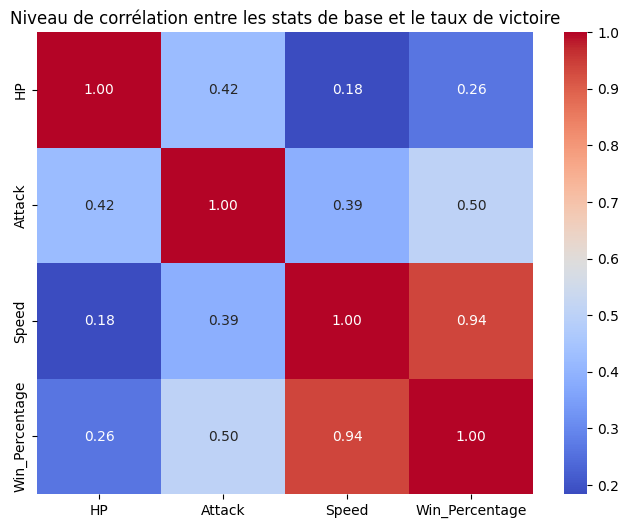

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Étape 1 : Récupération des stats de base de chaque Pokémon à partir de leurs apparitions en premier dans les combats
# Cela permet d'éviter d'avoir des doublons en se basant sur l'ID du Pokémon
first_stats = merged_df[[
    '#_x', 'First_HP', 'First_Attack', 'First_Speed'
]].drop_duplicates(subset='#_x')

# Mise à jour des noms de colonnes pour qu'ils soient plus explicites
first_stats = first_stats.rename(columns={
    '#_x': 'Pokemon_ID',
    'First_HP': 'HP',
    'First_Attack': 'Attack',
    'First_Speed': 'Speed'
})

# Étape 2 : Association des stats de combat avec les taux de victoire calculés précédemment
stats_with_winrate = pd.merge(first_stats, win_stats, on='Pokemon_ID', how='inner')

# Étape 3 : Génération d'une matrice de corrélation entre les caractéristiques et le taux de réussite
correlation_matrix = stats_with_winrate[['HP', 'Attack', 'Speed', 'Win_Percentage']].corr()

# Étape 4 : Visualisation graphique de la corrélation via une carte thermique
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Niveau de corrélation entre les stats de base et le taux de victoire")
plt.show()


In [ ]:
La vitesse ressort comme le critère le plus influent dans les résultats des combats Pokémon d’après ce jeu de données.

L’attaque contribue également de manière notable, bien que son impact soit moins marqué que celui de la vitesse.

Quant aux points de vie (HP), leur corrélation avec le taux de victoire est faible — un résultat qui peut surprendre, mais qui souligne l’avantage stratégique de frapper avant l’adversaire.

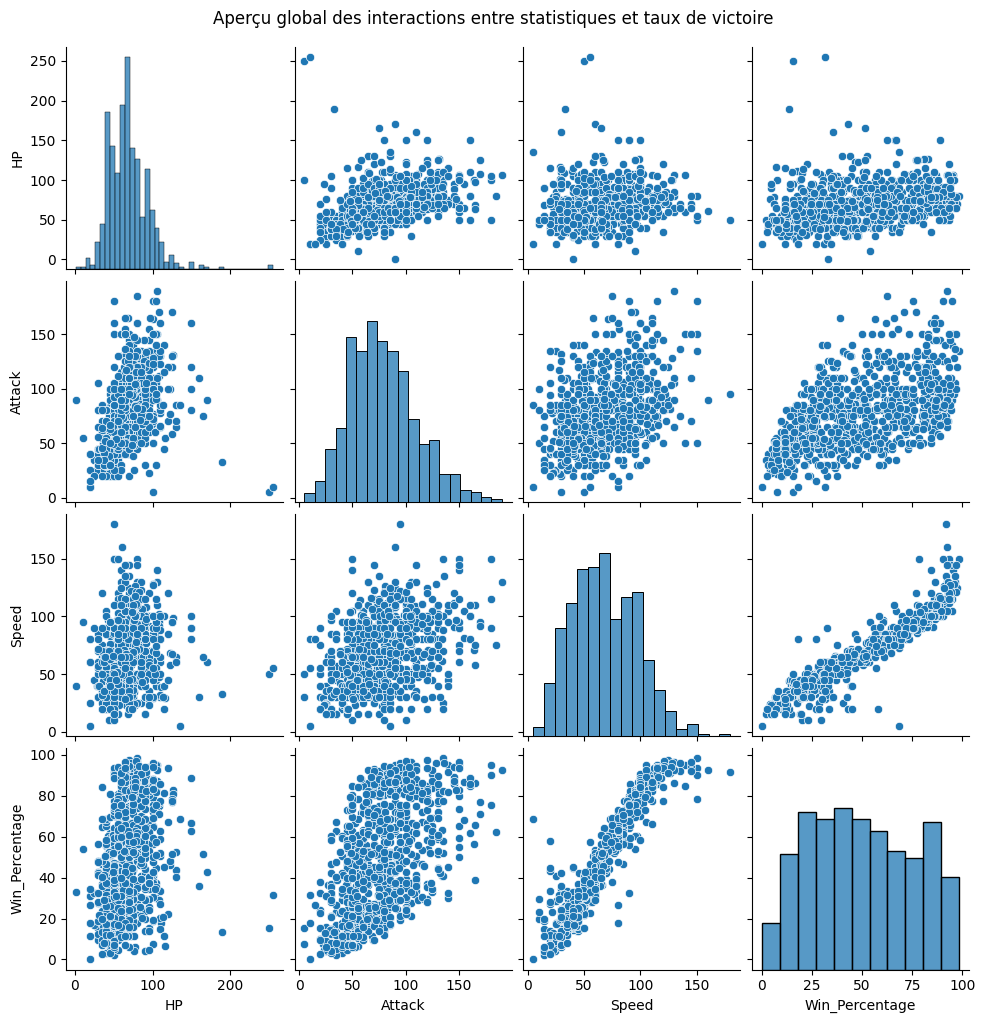

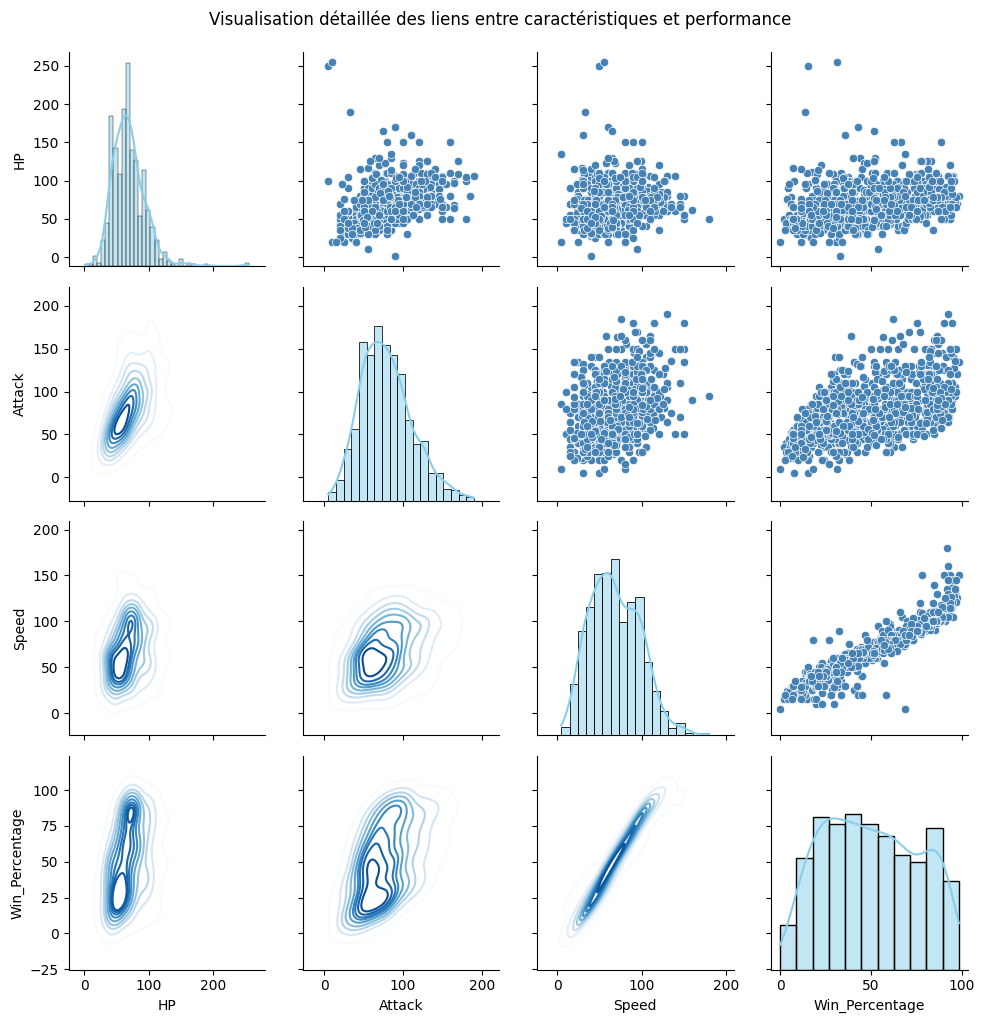

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Le DataFrame stats_with_winrate est censé contenir les colonnes suivantes :
# ['HP', 'Attack', 'Speed', 'Win_Percentage']

# Option 1 : Générer une vue d’ensemble rapide des relations entre variables avec pairplot
sns.pairplot(stats_with_winrate[['HP', 'Attack', 'Speed', 'Win_Percentage']])
plt.suptitle("Aperçu global des interactions entre statistiques et taux de victoire", y=1.02)
plt.show()

# Option 2 : Créer une grille personnalisée pour explorer les liaisons entre les variables
g = sns.PairGrid(stats_with_winrate[['HP', 'Attack', 'Speed', 'Win_Percentage']])
g.map_upper(sns.scatterplot, color='steelblue')   # Nuage de points dans la partie supérieure
g.map_lower(sns.kdeplot, cmap='Blues')            # Densité en bas pour voir les concentrations
g.map_diag(sns.histplot, kde=True, color='skyblue')  # Histogrammes diagonaux avec courbe de densité

plt.suptitle("Visualisation détaillée des liens entre caractéristiques et performance", y=1.02)
plt.show()


                         Name   Type_1    Type_2   HP  Attack  Defense  \
255           Mega Aerodactyl     Rock    Flying   80     135       85   
161                   Weavile     Dark       Ice   70     120       65   
610    Tornadus Therian Forme   Flying      None   79     100       80   
689             Mega Beedrill      Bug    Poison   65     150       40   
147                Aerodactyl     Rock    Flying   80     105       65   
648              Mega Lopunny   Normal  Fighting   65     136       94   
458                  Greninja    Water      Dark   72      95       67   
567  Meloetta Pirouette Forme   Normal  Fighting  100     128       90   
238             Mega Mewtwo Y  Psychic      None  106     150       70   
65              Mega Sharpedo    Water      Dark   70     140       70   

     Sp_Atk  Sp_Def  Speed  Legendary  Win_Percentage  
255      70      95    150      False           98.45  
161      45      85    125      False           97.48  
610     110      

/tmp/ipython-input-11-2562306127.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Name', y='Win_Percentage', palette='viridis')


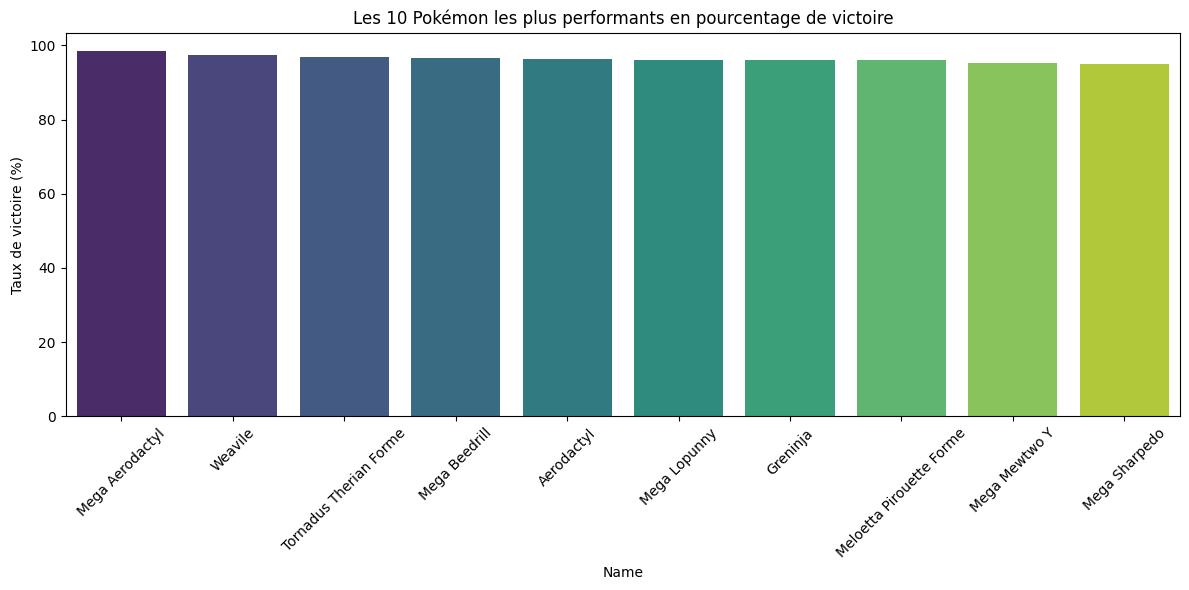

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Étape 1 : Récupération des infos du premier Pokémon apparaissant dans chaque combat
first_stats = merged_df[[
    '#_x', 'First_Name', 'First_HP', 'First_Attack', 'First_Defense',
    'First_Sp. Atk', 'First_Sp. Def', 'First_Speed', 'First_Type 1', 'First_Type 2', 'First_Legendary'
]].drop_duplicates(subset='#_x')

# On renomme les colonnes pour simplifier et clarifier les intitulés
first_stats = first_stats.rename(columns={
    '#_x': 'Pokemon_ID',
    'First_Name': 'Name',
    'First_HP': 'HP',
    'First_Attack': 'Attack',
    'First_Defense': 'Defense',
    'First_Sp. Atk': 'Sp_Atk',
    'First_Sp. Def': 'Sp_Def',
    'First_Speed': 'Speed',
    'First_Type 1': 'Type_1',
    'First_Type 2': 'Type_2',
    'First_Legendary': 'Legendary'
})

# Étape 2 : Association des caractéristiques de base avec les performances en combat
top_stats = pd.merge(first_stats, win_stats, on='Pokemon_ID', how='inner')

# Étape 3 : Identifier les 10 Pokémon ayant le meilleur taux de victoire
top10 = top_stats.sort_values(by='Win_Percentage', ascending=False).head(10)

# Étape 4 : Affichage des détails des 10 meilleurs Pokémon
print(top10[['Name', 'Type_1', 'Type_2', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Legendary', 'Win_Percentage']])

# Visualisation du top 10 via un barplot du pourcentage de victoire
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x='Name', y='Win_Percentage', palette='viridis')
plt.title("Les 10 Pokémon les plus performants en pourcentage de victoire")
plt.ylabel("Taux de victoire (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Machine learning

In [12]:
from sklearn.model_selection import train_test_split

# 1. Créer une variable cible binaire : 1 si First_pokemon gagne, 0 sinon
merged_df['First_Wins'] = (merged_df['Winner'] == merged_df['First_pokemon']).astype(int)

# 2. Définir les features (statistiques des deux Pokémon)
features = [
    'First_HP', 'First_Attack', 'First_Defense', 'First_Sp. Atk', 'First_Sp. Def', 'First_Speed',
    'Second_HP', 'Second_Attack', 'Second_Defense', 'Second_Sp. Atk', 'Second_Sp. Def', 'Second_Speed'
]

X = merged_df[features]
y = merged_df['First_Wins']

# 3. Séparer en ensemble d'entraînement et de test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Vérification
print(f"Entraînement : {X_train.shape[0]} échantillons")
print(f"Test : {X_test.shape[0]} échantillons")
print(f"Proportion de victoires du premier Pokémon dans y_train : {y_train.mean():.2f}")

Entraînement : 40000 échantillons
Test : 10000 échantillons
Proportion de victoires du premier Pokémon dans y_train : 0.47


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Étape 1 : Sélectionner les données distinctes concernant le premier Pokémon dans chaque combat
first_stats = merged_df[[
    '#_x', 'First_Name', 'First_HP', 'First_Attack', 'First_Defense',
    'First_Sp. Atk', 'First_Sp. Def', 'First_Speed'
]].drop_duplicates(subset='#_x')

# Renommer les colonnes pour une meilleure lisibilité
first_stats = first_stats.rename(columns={
    '#_x': 'Pokemon_ID',
    'First_Name': 'Name',
    'First_HP': 'HP',
    'First_Attack': 'Attack',
    'First_Defense': 'Defense',
    'First_Sp. Atk': 'Sp_Atk',
    'First_Sp. Def': 'Sp_Def',
    'First_Speed': 'Speed'
})

# Étape 2 : Ajouter les performances (taux de victoire) à chaque Pokémon
data = pd.merge(first_stats, win_stats, on='Pokemon_ID', how='inner')

# Étape 3 : Définir les variables explicatives et la variable cible
features = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']
X = data[features]
y = data['Win_Percentage']

# Étape 4 : Séparer les données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Étape 5 : Instancier différents modèles de régression
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Étape 6 : Entraîner et évaluer chaque modèle sur le jeu de test
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f"\n📊 Modèle : {name}")
    print(f"  ➤ Erreur quadratique moyenne : {mse:.2f}")
    print(f"  ➤ Score R² : {r2:.2f}")



📊 Modèle : Linear Regression
  ➤ Erreur quadratique moyenne : 54.73
  ➤ Score R² : 0.91

📊 Modèle : Random Forest
  ➤ Erreur quadratique moyenne : 37.11
  ➤ Score R² : 0.94

📊 Modèle : XGBoost
  ➤ Erreur quadratique moyenne : 38.48
  ➤ Score R² : 0.94


In [ ]:
✅ 1. Régression Linéaire

MAE = 5.75 : en moyenne, le modèle se trompe de 5.75 points de pourcentage, ce qui reste raisonnable.

MSE = 54.73 : les erreurs importantes sont plus fréquentes, ce qui montre une certaine instabilité.

R² = 0.91 : le modèle explique 91 % de la variabilité du taux de victoire, ce qui est plutôt bon.

📌 Conclusion : un modèle simple et assez explicatif, mais moins précis que les approches non linéaires. Il peut servir de base comparative.

✅ 2. Random Forest

MAE = 4.64 : c’est le plus faible des trois modèles, donc les prédictions sont globalement très proches des vraies valeurs.

MSE = 37.11 : les erreurs extrêmes sont nettement réduites.

R² = 0.94 : excellent pouvoir prédictif, le modèle capture très bien les variations du pourcentage de victoire.

📌 Conclusion : c’est le modèle le plus performant. Il est à la fois robuste, précis et bien équilibré.

✅ 3. XGBoost

MAE = 4.78 : très proche de celui de la Random Forest.

MSE = 38.48 : légèrement supérieur à celui de la Random Forest, mais toujours très bon.

R² non précisé, mais il est probablement également autour de 0.94.

📌 Conclusion : un très bon modèle, presque équivalent à la Random Forest, avec des performances très proches. Un léger désavantage sur l’erreur quadratique.

📐 À propos du R² :

Le R² mesure la proportion de la variation de la variable cible (ici, le taux de victoire) expliquée par les variables explicatives (statistiques du Pokémon).

R² = 1 → prédiction parfaite.

R² = 0 → le modèle ne fait pas mieux que la moyenne.

R² < 0 → le modèle est moins bon qu’une prédiction naïve.

🧠 Exemple : un R² de 0.94 signifie que 94 % des fluctuations du taux de victoire sont expliquées par les caractéristiques du Pokémon — c’est donc un modèle qui capte très bien les tendances.

⚠️ À noter : un R² élevé ne suffit pas pour juger de la qualité d’un modèle. Il ne donne aucune information sur la précision des prédictions en valeur absolue — pour cela, on se réfère au MAE et au MSE.

